In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ml_project/airbnb_onehot0113.xlsx')
df

,log_price,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities_count,accommodates,cancellation_policy,...,breakfast,internet,kitchen,free parking on premises,air-conditioning or heating,hot tub,washer,dryer,self check-in,tv
0,5.010635,Apartment,Entire home/apt,1.0,1,1,Real Bed,8,3,strict,...,0,1,1,0,1,0,0,0,0,1
1,5.129899,Apartment,Entire home/apt,1.0,3,3,Real Bed,14,7,strict,...,0,1,1,0,1,0,1,1,0,1
2,4.976734,Apartment,Entire home/apt,1.0,1,3,Real Bed,18,5,moderate,...,1,1,1,0,1,0,0,0,0,1
3,4.744932,Apartment,Entire home/apt,1.0,0,1,Real Bed,12,2,moderate,...,0,1,1,0,1,0,0,0,0,1
4,4.442651,Apartment,Private room,1.0,1,1,Real Bed,10,2,strict,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55523,5.135798,Apartment,Entire home/apt,1.0,1,1,Real Bed,24,2,moderate,...,0,1,0,0,1,0,0,0,1,1
55524,4.356709,Apartment,Entire home/apt,1.0,1,1,Real Bed,26,2,strict,...,0,1,1,0,1,0,1,1,0,1
55525,4.248495,House,Private room,1.0,1,1,Real Bed,13,2,moderate,...,0,1,1,1,1,0,1,1,0,1
55526,5.043425,Apartment,Entire home/apt,2.0,2,4,Real Bed,15,4,moderate,...,0,1,1,1,1,0,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55528 entries, 0 to 55527
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   log_price                    55528 non-null  float64
 1   property_type                55528 non-null  object 
 2   room_type                    55528 non-null  object 
 3   bathrooms                    55528 non-null  float64
 4   bedrooms                     55528 non-null  int64  
 5   beds                         55528 non-null  int64  
 6   bed_type                     55528 non-null  object 
 7   amenities_count              55528 non-null  int64  
 8   accommodates                 55528 non-null  int64  
 9   cancellation_policy          55528 non-null  object 
 10  cleaning_fee                 55528 non-null  bool   
 11  city                         55528 non-null  object 
 12  latitude                     55528 non-null  float64
 13  longitude       

# 범주형 변수 인코딩

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

label_encoder = LabelEncoder()

# 각 범주형 변수에 대해 반복문을 통한 인코딩 수행
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

df

,log_price,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities_count,accommodates,cancellation_policy,...,washer,dryer,self check-in,tv,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_encoded,city_encoded
0,5.010635,Apartment,Entire home/apt,1.0,1,1,Real Bed,8,3,strict,...,0,0,0,1,0,0,4,2,1,4
1,5.129899,Apartment,Entire home/apt,1.0,3,3,Real Bed,14,7,strict,...,1,1,0,1,0,0,4,2,1,4
2,4.976734,Apartment,Entire home/apt,1.0,1,3,Real Bed,18,5,moderate,...,0,0,0,1,0,0,4,1,1,4
3,4.744932,Apartment,Entire home/apt,1.0,0,1,Real Bed,12,2,moderate,...,0,0,0,1,0,0,4,1,1,2
4,4.442651,Apartment,Private room,1.0,1,1,Real Bed,10,2,strict,...,0,0,0,1,0,1,4,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55523,5.135798,Apartment,Entire home/apt,1.0,1,1,Real Bed,24,2,moderate,...,0,0,1,1,0,0,4,1,1,5
55524,4.356709,Apartment,Entire home/apt,1.0,1,1,Real Bed,26,2,strict,...,1,1,0,1,0,0,4,2,1,1
55525,4.248495,House,Private room,1.0,1,1,Real Bed,13,2,moderate,...,1,1,0,1,6,1,4,1,1,3
55526,5.043425,Apartment,Entire home/apt,2.0,2,4,Real Bed,15,4,moderate,...,1,1,0,1,0,0,4,1,1,3


In [ ]:
# 범주형 변수 칼럼 삭제
cols_to_drop = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city']
df_drop = df.drop(columns = cols_to_drop)

In [ ]:
df_drop

,log_price,bathrooms,bedrooms,beds,amenities_count,accommodates,latitude,longitude,number_of_reviews,review_scores_rating,...,washer,dryer,self check-in,tv,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_encoded,city_encoded
0,5.010635,1.0,1,1,8,3,40.696524,-73.991617,2,100,...,0,0,0,1,0,0,4,2,1,4
1,5.129899,1.0,3,3,14,7,40.766115,-73.989040,6,93,...,1,1,0,1,0,0,4,2,1,4
2,4.976734,1.0,1,3,18,5,40.808110,-73.943756,10,92,...,0,0,0,1,0,0,4,1,1,4
3,4.744932,1.0,0,1,12,2,38.925627,-77.034596,4,40,...,0,0,0,1,0,0,4,1,1,2
4,4.442651,1.0,1,1,10,2,37.753164,-122.429526,3,100,...,0,0,0,1,0,1,4,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55523,5.135798,1.0,1,1,24,2,37.789989,-122.407384,24,98,...,0,0,1,1,0,0,4,1,1,5
55524,4.356709,1.0,1,1,26,2,41.909067,-87.623046,6,100,...,1,1,0,1,0,0,4,2,1,1
55525,4.248495,1.0,1,1,13,2,34.092640,-118.343921,36,91,...,1,1,0,1,6,1,4,1,1,3
55526,5.043425,2.0,2,4,15,4,33.871549,-118.396053,16,93,...,1,1,0,1,0,0,4,1,1,3


# 훈련데이터 테스트데이터 분할하기

In [ ]:
X = df.drop('log_price', axis=1)
y = df['log_price']

# 데이터를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 구축

In [ ]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 26))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# early stopping 적용
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# 모델 학습

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=20, callbacks = [early_stopping])

Epoch 1/50
1944/1944 [==============================] - 7s 3ms/step - loss: 0.3110
Epoch 2/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1853
Epoch 3/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1805
Epoch 4/50
1944/1944 [==============================] - 6s 3ms/step - loss: 0.1721
Epoch 5/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1688
Epoch 6/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1651
Epoch 7/50
1944/1944 [==============================] - 5s 2ms/step - loss: 0.1632
Epoch 8/50
1944/1944 [==============================] - 5s 3ms/step - loss: 0.1611
Epoch 9/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1606
Epoch 10/50
1944/1944 [==============================] - 4s 2ms/step - loss: 0.1588
Epoch 11/50
1944/1944 [==============================] - 6s 3ms/step - loss: 0.1586
Epoch 12/50
1944/1944 [==============================] - 5s 2ms/step - loss: 0.1574
E

# 구축한 모델로 예측 진행

In [ ]:
y_pred = model.predict(X_test)
y_pred

521/521 [==============================] - 1s 1ms/step


array([[4.031184 ],
       [5.238415 ],
       [4.2203493],
       ...,
       [4.884039 ],
       [4.4259467],
       [4.057361 ]], dtype=float32)

# 성능평가

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("mse : %.4f" % (mse))

mse : 0.1459


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R^2 스코어 : %.4f" % (r2))

R^2 스코어 : 0.6237


In [ ]:
corr = np.corrcoef(y_test, y_pred.flatten())[0, 1]
print("예측값과 실제값의 상관관계 : %.4f" % (corr))

예측값과 실제값의 상관관계 : 0.7919


# 모델 요약

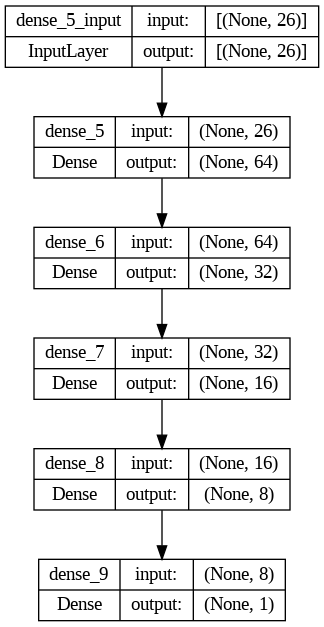

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

# 실제값과 예측값 비교

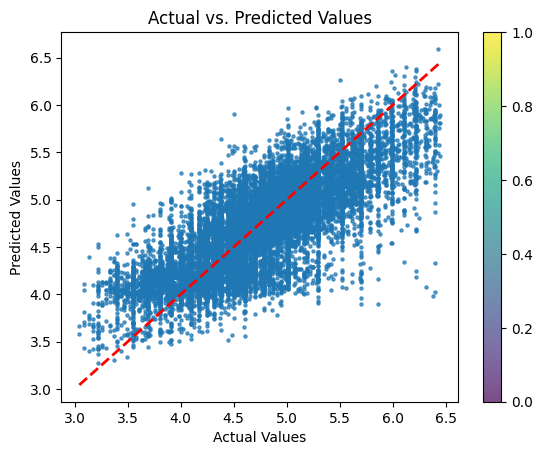

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7, s = 5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.colorbar()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

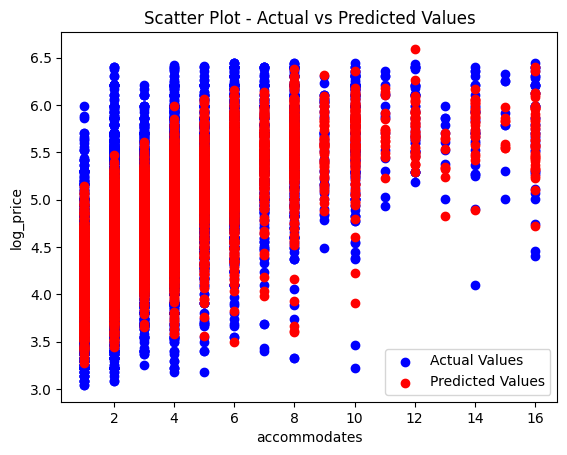

In [ ]:
# 수용인원에 대한 예측값과 실제값의 차이
plt.scatter(X_test['accommodates'], y_test, label='Actual Values', color='blue')
plt.scatter(X_test['accommodates'], y_pred, label='Predicted Values', color='red')

plt.xlabel('accommodates')
plt.ylabel('log_price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

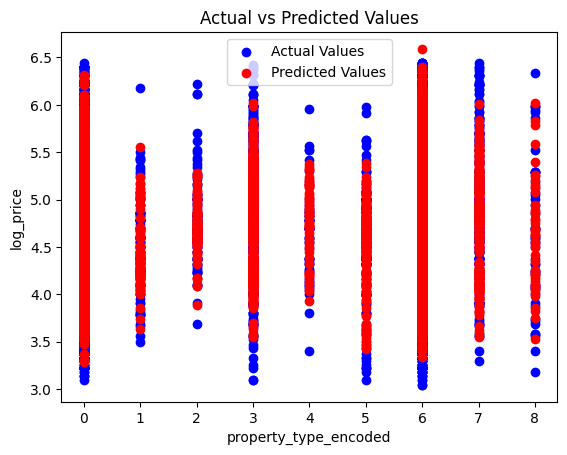

In [ ]:
# 숙소의 종류에 대한 예측값과 실제값의 차이
plt.scatter(X_test['property_type_encoded'], y_test, label='Actual Values', color='blue')
plt.scatter(X_test['property_type_encoded'], y_pred, label='Predicted Values', color='red')

plt.xlabel('property_type_encoded')
plt.ylabel('log_price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()